#Loan Default Prediction


---



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Forage_Projects/Task 3 and 4_Loan_Data.csv')

In [6]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [8]:
## Checking Nulls
df.isna().sum()

,0
customer_id,0
credit_lines_outstanding,0
loan_amt_outstanding,0
total_debt_outstanding,0
income,0
years_employed,0
fico_score,0
default,0


In [9]:
## Checking Duplicates
df[df.duplicated()]

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default


In [43]:
df.credit_lines_outstanding.unique()

array([0, 5, 1, 4, 2, 3])

In [11]:
## Checking Differential Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,4.974577e+06,2.293890e+06,1.000324e+06,2.977661e+06,4.989502e+06,6.967210e+06,8.999789e+06
credit_lines_outstanding,10000.0,1.461200e+00,1.743846e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
loan_amt_outstanding,10000.0,4.159677e+03,1.421399e+03,4.678397e+01,3.154235e+03,4.052377e+03,5.052898e+03,1.075068e+04
total_debt_outstanding,10000.0,8.718917e+03,6.627165e+03,3.165273e+01,4.199836e+03,6.732407e+03,1.127226e+04,4.368878e+04
income,10000.0,7.003990e+04,2.007221e+04,1.000000e+03,5.653987e+04,7.008583e+04,8.342917e+04,1.484122e+05
years_employed,10000.0,4.552800e+00,1.566862e+00,0.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01
fico_score,10000.0,6.375577e+02,6.065791e+01,4.080000e+02,5.970000e+02,6.380000e+02,6.790000e+02,8.500000e+02
default,10000.0,1.851000e-01,3.883981e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [13]:
## All features correlation with Default
df.corr()['default'].sort_values(ascending=False)

,default
default,1.000000
credit_lines_outstanding,0.862815
total_debt_outstanding,0.758868
loan_amt_outstanding,0.098978
income,0.016309
customer_id,0.006927
years_employed,-0.284506
fico_score,-0.324515


***Observations:***
- credit_lines_outstanding (0.862815):

    Strong Positive Correlation: As the number of credit lines outstanding increases, the likelihood of default also increases significantly.

- total_debt_outstanding (0.758868):

    Strong Positive Correlation: Higher total debt outstanding is strongly associated with a higher likelihood of default.

- loan_amt_outstanding (0.098978):

    Weak Positive Correlation: There is a slight tendency for higher loan amounts outstanding to be associated with defaults, but the correlation is weak.

- income (0.016309):

    Very Weak Positive Correlation: Income has a very slight positive correlation with default, but it's nearly negligible.

- customer_id (0.006927):

    Very Weak Positive Correlation: Customer ID has a negligible correlation with default, indicating that it's not relevant for predicting default.

- years_employed (-0.284506):

    Moderate Negative Correlation: More years of employment are moderately associated with a lower likelihood of default.

- fico_score (-0.324515):

    Moderate Negative Correlation: Higher FICO scores are moderately associated with a lower likelihood of default.



###Visualization

<Axes: >

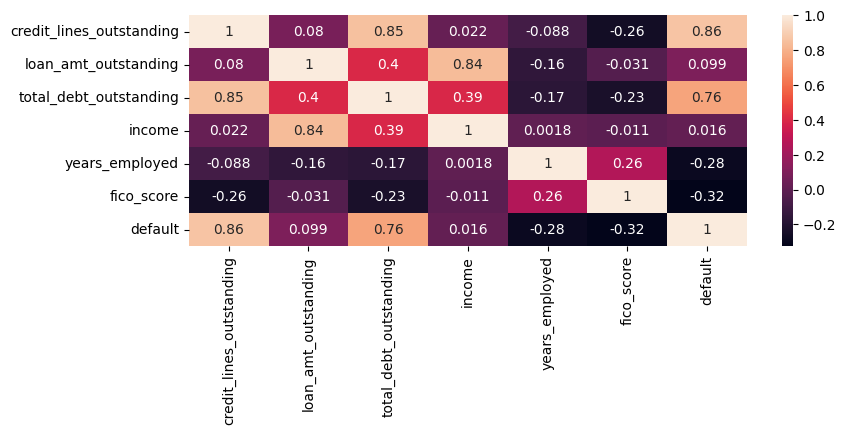

In [44]:
## Checking correlation
plt.figure(figsize=(9,3))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Defaults Frequency')

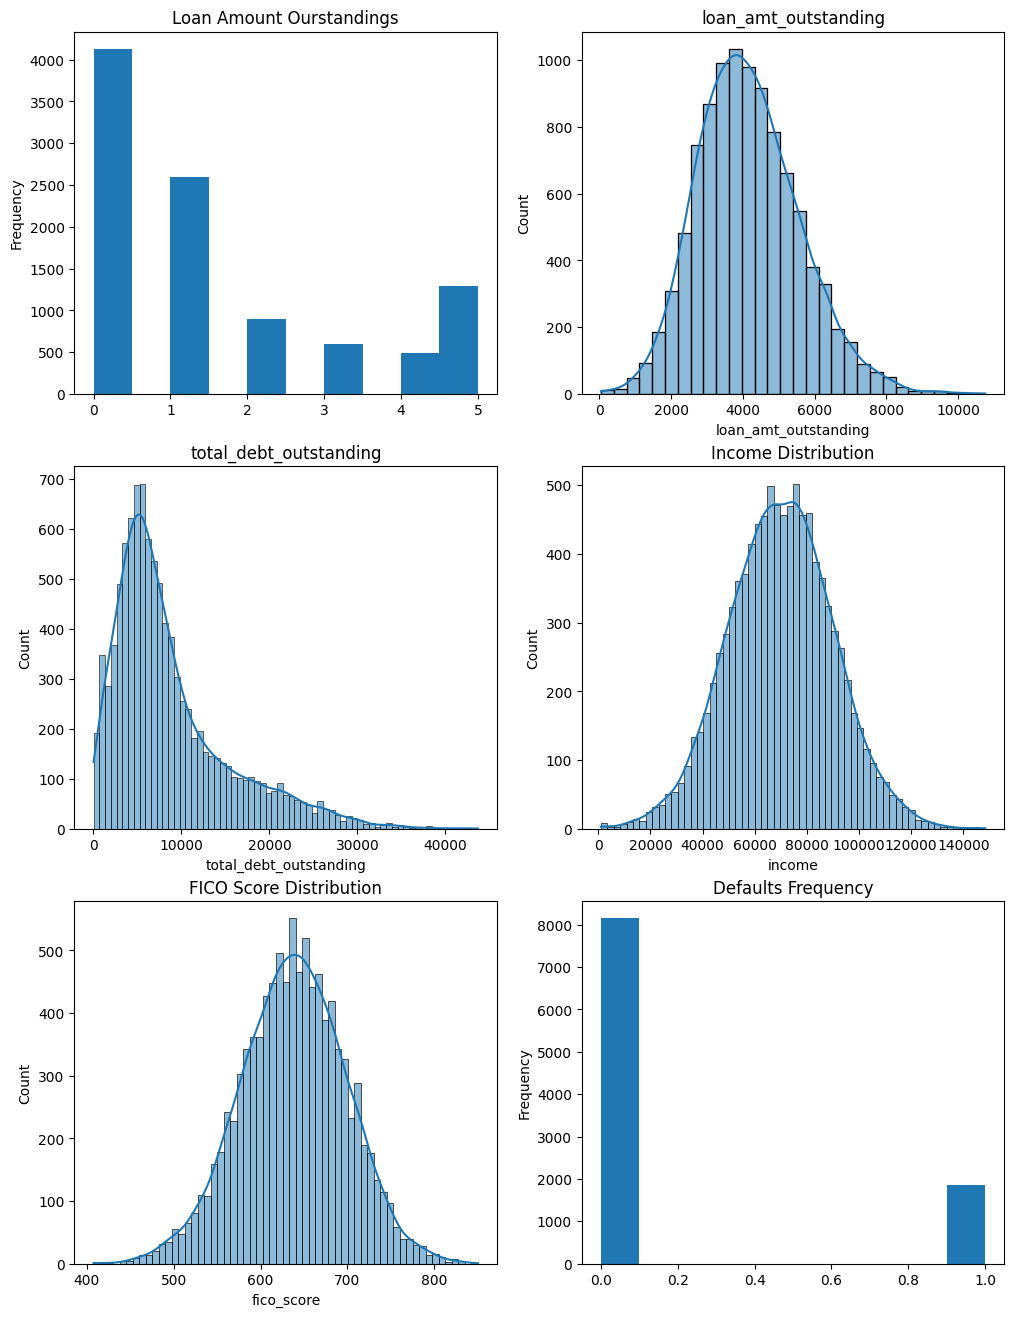

In [77]:
## Checking Loan Amount Ourstandings
fig,axes = plt.subplots(3,2,figsize=(12,16))
df['credit_lines_outstanding'].plot(kind='hist', ax=axes[0,0])
axes[0,0].set_title("Loan Amount Ourstandings")

# Checking loan_amt_outstanding distribution
sns.histplot(df['loan_amt_outstanding'], bins=30, kde=True, edgecolor='k', ax=axes[0,1])
axes[0,1].set_title("loan_amt_outstanding")

# Checking loan_amt_outstanding distribution
sns.histplot(df['total_debt_outstanding'], kde=True, edgecolor='k', ax=axes[1,0])
axes[1,0].set_title("total_debt_outstanding")

## Checking Income distribution
sns.histplot(df['income'], kde='True', edgecolor='k', ax=axes[1,1])
axes[1,1].set_title("Income Distribution")

## FICO-Score
sns.histplot(df['fico_score'], kde=True, edgecolor='k', ax=axes[2,0])
axes[2,0].set_title("FICO Score Distribution")

## CHecking Dataset is balance or not
df['default'].plot(kind='hist', ax=axes[2,1])
axes[2,1].set_title("Defaults Frequency")

***Observations:***
- credit_lines_outstanding: Is in range of 0 to 5. Having 0 as highest count followed by 1
- credit_lines_outstanding: Have a normal distribution curve
- total_debt_outstanding: shows right skewed distribution. Maximum custumers have total debt outstanding in range of 5000 to 10000
- Income: Shows Normal Distribution. Maximum population have income in range of 55000 to 85000
- FICO Score: Shows normal distribution with maximum customers having FICO Score around 600 to 700.
- Default: Shows imbalance in values count. SHowa Imbalance Dataset.



In [14]:
## dropping customer Id column
df.drop('customer_id', axis=1, inplace=True)

### Checking Model Accuracy and choosing Best Fit

In [15]:
X = df.drop(columns='default')
y = df['default']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
## Applying Scalling
scalling = StandardScaler()
X_train = scalling.fit_transform(X_train)
X_test = scalling.transform(X_test)

In [18]:
## Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [19]:
y_pred_log = log_reg.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [21]:
accuracy_log = accuracy_score(y_test,y_pred_log)
accuracy_log

0.9955

In [22]:
## Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred_rf = rf.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [25]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.9945

In [26]:
## Neural Network

## Building Model
model_NN = Sequential()
model_NN.add(Dense(64,activation='relu', input_shape=(X_train.shape[1],)))
model_NN.add(Dense(32, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
## Compiler
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
## Model Training
model_NN.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8633 - loss: 0.3457 - val_accuracy: 0.9794 - val_loss: 0.0546
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0541 - val_accuracy: 0.9862 - val_loss: 0.0343
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0365 - val_accuracy: 0.9956 - val_loss: 0.0225
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9962 - val_loss: 0.0160
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9987 - val_loss: 0.0132
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0160 - val_accuracy: 0.9981 - val_loss: 0.0109
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9972 - loss: 0.0134 - val_accuracy: 0.9962 - val_loss: 0.0113
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0101 - val_accuracy: 0.

In [29]:
y_pred_NN = model_NN.predict(X_test)
y_pred_NN = (y_pred_NN > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
accuracy_NN = accuracy_score(y_test,y_pred_NN)
accuracy_NN

0.9955

In [31]:
## Comparing all models accuracy
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [accuracy_log, accuracy_rf, accuracy_NN]
print(pd.DataFrame({'Model':models,'Accuracy':accuracies}))

                 Model  Accuracy
0  Logistic Regression    0.9955
1        Random Forest    0.9945
2       Neural Network    0.9955


- Neural Network has highest accuracy, Hence using the NN for further model building

In [84]:
### Model for Production

def train_model(df):
    X = df.drop(columns=['customer_id','default'])
    y = df['default']

    scalling = StandardScaler()
    X = scalling.fit_transform(X)

    model = Sequential()
    model.add(Dense(64, kernel_initializer='he_uniform' ,activation='relu', input_shape=( X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='glorot_uniform' ,activation ='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_NN = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
    return model_NN, scalling


def predict_default(model, new_data):
    new_data = new_data.drop('customer_id',axis=1)
    scaled_data = scalling.transform(new_data)
    predict_proba = model_NN.predict(scaled_data)
    default_probability = (predict_proba > 0.5).astype(int)

    recovery_rate = 0.10
    loan_amount = list(new_data['loan_amt_outstanding'])
    expected_loss = predict_proba * loan_amount * (1 - recovery_rate)

    return default_probability, expected_loss


### Example:

In [82]:
training_code = train_model(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Forage_Projects/Task 3 and 4_Loan_Data.csv'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8284 - loss: 0.4263 - val_accuracy: 0.9625 - val_loss: 0.0823
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1166 - val_accuracy: 0.9685 - val_loss: 0.0669
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9620 - loss: 0.0937 - val_accuracy: 0.9725 - val_loss: 0.0583
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9682 - loss: 0.0799 - val_accuracy: 0.9745 - val_loss: 0.0526
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.0678 - val_accuracy: 0.9820 - val_loss: 0.0462
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0621 - val_accuracy: 0.9860 - val_loss: 0.0404
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0514 - val_accuracy: 0.9870 - val_loss: 0.0355
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0424 - val_accuracy: 0.

In [85]:
new_data = pd.DataFrame({
    'customer_id': [123456],
    'credit_lines_outstanding': [0],
    'loan_amt_outstanding': [500000],
    'total_debt_outstanding': [550000],
    'income': [100000],
    'years_employed': [5],
    'fico_score': [0]
})

default_probability,expected_loss  = predict_default(training_code, new_data)
print("Default Probability: ",default_probability)
print("Expected Loss",expected_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Default Probability:  [[1]]
Expected Loss [[443863.91043663]]
